In [62]:
import numpy as np
import matplotlib.pyplot as plt



def plot_potential_and_diffusion(potential_scalar_field, diffusion_matrix_field, title):
    # Generate a grid of points
    x = np.linspace(-2, 2, 20)
    y = np.linspace(-2, 2, 20)
    X, Y = np.meshgrid(x, y)

    # Calculate the eigenvalues and eigenvectors of the matrix field at each point
    U1 = np.zeros((len(x), len(y)))
    V1 = np.zeros((len(x), len(y)))
    U2 = np.zeros((len(x), len(y)))
    V2 = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            eigenvalues, eigenvectors = np.linalg.eig(diffusion_matrix_field(x[i], y[j]))
            if eigenvalues[0] > eigenvalues[1]:
                U1[i, j] = eigenvectors[0, 0]
                V1[i, j] = eigenvectors[1, 0]
                U2[i, j] = eigenvectors[0, 1]
                V2[i, j] = eigenvectors[1, 1]
            else:
                U1[i, j] = eigenvectors[0, 1]
                V1[i, j] = eigenvectors[1, 1]
                U2[i, j] = eigenvectors[0, 0]
                V2[i, j] = eigenvectors[1, 0]

    # Plot the eigenvectors scaled by eigenvalues
    plt.contourf(X, Y, potential_scalar_field(X, Y), 20, cmap='viridis')
    plt.quiver(X, Y, U1 * eigenvalues[0], V1 * eigenvalues[0], scale=20, color='k', label='Eigenvalue 1')
    plt.quiver(X, Y, U2 * eigenvalues[1], V2 * eigenvalues[1], scale=20, color='r', label='Eigenvalue 2')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()

    # Colour contour plot of the potential

    plt.show()



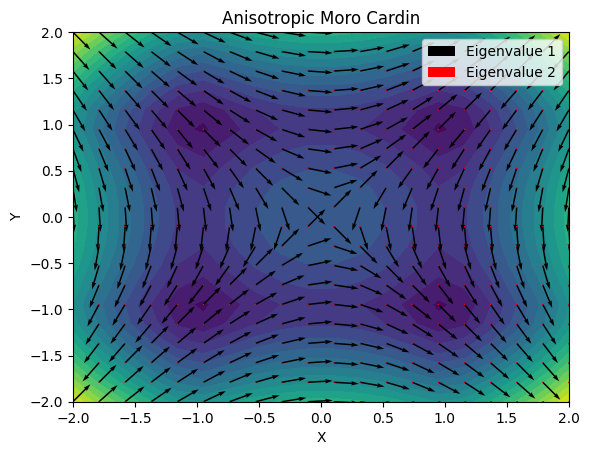

In [63]:
# Define the matrix field function
def anisotropic_MoroCardin_matrix_field(x, y):
    theta_x = np.arctan2(y, x)
    theta_y = np.arctan2(x, y)
    factor = 1.0 + 5.0 * np.exp(- (x**2 + y**2) / (2 * 0.3**2))
    inv_factor = 1.0 / factor
    matrix = np.array([[np.cos(theta_x)**2, np.cos(theta_x) * np.cos(theta_y)],
                       [np.cos(theta_x) * np.cos(theta_y), np.cos(theta_y)**2]])
    return inv_factor * matrix

def quadruple_well_potential(x, y):
    return np.sqrt(17/16 - 2*x**2 + x**4) + np.sqrt(17/16 - 2*y**2 + y**4)

plot_potential_and_diffusion(quadruple_well_potential, anisotropic_MoroCardin_matrix_field, "Anisotropic Moro Cardin")

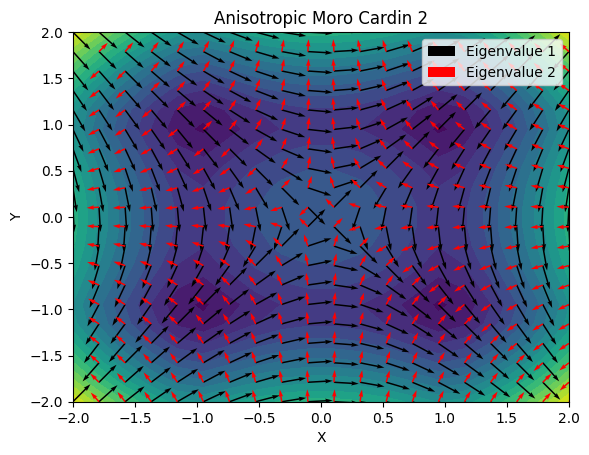

In [66]:
def anisotropic_MoroCardin_matrix_field2(x, y):
    theta = np.arctan2(y, x)
    factor = 1.0 + 5.0 * np.exp(- (x**2 + y**2) / (2 * 0.3**2))
    inf_factor = 1.0 / factor
    matrix = np.array([[1-np.sin(theta)**2 / 2, np.cos(theta) * np.sin(theta) / 2],
                       [np.cos(theta) * np.sin(theta)/2, 1 - np.cos(theta)**2 / 2]])
    return inf_factor * matrix

plot_potential_and_diffusion(quadruple_well_potential, anisotropic_MoroCardin_matrix_field2, "Anisotropic Moro Cardin 2")